# Sentiment Analysis of Disneyland's french reviews

Sentiment Analysis is looking at what your customers think of your product. We will understand what people think about Disneyland Amusement Park.

## Data Preprocessing

### Import Data 



In [1]:
# Import Tensorflow & Pathlib librairies
import tensorflow as tf 
import tensorflow_datasets as tfds
import pathlib 
import pandas as pd 
tf.__version__

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


'2.5.0-rc1'

In [2]:
# Import dataset in Pandas 
dataset = pd.read_csv("https://go.aws/314bBDq", error_bad_lines=False, encoding="utf-8")
dataset.head()

,user_id,review,stars,date_format,time_of_day,hour_of_day,day_of_week,review_format,review_lang,month_year,review_len,review_nb_words
0,efb62a167fee5cf3678b24427de8e31f,"Génial, fabuleux, exceptionnel ! J'aimerais qu...",5,2017-09-29 18:17:00,18:17,18,Ven,génial fabuleux exceptionnel j aimerais qu...,french,2017-09,115,19
1,e3be4f9c9e0b9572bfb2a5f88497bb14,NaN,2,2017-09-29 17:29:00,17:29,17,Ven,NaN,NaN,2017-09,0,0
2,1b8e5760162d867e9b9ca80f645bdc60,"Toujours aussi magic, féerique !",5,2017-09-29 16:46:00,16:46,16,Ven,toujours aussi magic féerique,french,2017-09,32,4
3,fa330e5891a1bb486c3e9bf95c098726,NaN,5,2017-09-29 15:52:00,15:52,15,Ven,NaN,NaN,2017-09,0,0
4,c1a693206aee1a2412d4bd9e45b80ec5,NaN,3,2017-09-29 15:29:00,15:29,15,Ven,NaN,NaN,2017-09,0,0


In [3]:
# Taking only french reviews
french_reviews = dataset[dataset.review_lang == "french"]
french_reviews.head()

,user_id,review,stars,date_format,time_of_day,hour_of_day,day_of_week,review_format,review_lang,month_year,review_len,review_nb_words
0,efb62a167fee5cf3678b24427de8e31f,"Génial, fabuleux, exceptionnel ! J'aimerais qu...",5,2017-09-29 18:17:00,18:17,18,Ven,génial fabuleux exceptionnel j aimerais qu...,french,2017-09,115,19
2,1b8e5760162d867e9b9ca80f645bdc60,"Toujours aussi magic, féerique !",5,2017-09-29 16:46:00,16:46,16,Ven,toujours aussi magic féerique,french,2017-09,32,4
11,726b1a3e2664e8b075129bcd643dbf56,En vacances en région parisienne nous nous som...,2,2017-09-29 00:37:00,00:37,0,Ven,en vacances en région parisienne nous nous som...,french,2017-09,172,25
12,8a71763fbb3da7436b957681b24cc404,Tropbeaufinalpleinlesyeuxoreil,5,2017-09-29 00:16:00,00:16,0,Ven,tropbeaufinalpleinlesyeuxoreil,french,2017-09,30,1
23,ce7abd7798ee036d667c0ad84b85daa7,L'univers Disney reste merveilleux. Toutefois ...,4,2017-09-28 20:24:00,20:24,20,Jeu,l univers disney reste merveilleux toutefois ...,french,2017-09,148,23


In [4]:
# Let's take the columns we're interested in
french_reviews = french_reviews[["review_format", "stars"]]
french_reviews.head()

,review_format,stars
0,génial fabuleux exceptionnel j aimerais qu...,5
2,toujours aussi magic féerique,5
11,en vacances en région parisienne nous nous som...,2
12,tropbeaufinalpleinlesyeuxoreil,5
23,l univers disney reste merveilleux toutefois ...,4


In [5]:
# Delete NaN
french_reviews = french_reviews.dropna()

In [6]:
# Unique value
french_reviews["stars"].unique()

array([5, 2, 4, 3, 1], dtype=int64)

In [7]:
# Shape of french_reviews dataset
french_reviews.shape

(8474, 2)

### Tokenize

We will now go through a Tokenation phase.

We download all language elements related to the French language 

In [8]:
!python -m spacy download fr_core_news_sm

[+] Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')


2021-04-20 15:25:48.490768: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-04-20 15:25:48.490822: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Load now `fr_core_news_sm`

In [9]:
# Import Spacy and french initialisation
import fr_core_news_sm
nlp = fr_core_news_sm.load()

Import french STOP_WORDS

In [10]:
# Import Stop words 
from spacy.lang.fr.stop_words import STOP_WORDS

For reasons of speed, it is good practice to load the whole text corpus in a single variable and process everything at once on Spacy. So we merge all the lines in the dataset into one big `string`

In [11]:
corpus = " ".join(french_reviews["review_format"].to_list())
len(corpus)

2034458

We will now have to clean our texts in order to prepare them for training.rds.

In [12]:
#using the command str.isalnum we remove all characters from the strings that are not alphanumeric except for whitespaces.
french_reviews["review_format_clean"] = french_reviews["review_format"].apply(lambda x:''.join(ch for ch in x if ch.isalnum() or ch==" "))

#using str.replace, str.lower and str.strip we replace double whitespaces with single whitespaces, convert all characters to lowercase and trim starting and finishing whitespaces.
french_reviews["review_format_clean"] = french_reviews["review_format_clean"].apply(lambda x: x.replace(" +"," ").lower().strip())

#using spacy, we replace all tokens in the texts with lemma_ and remove all the stop words.
french_reviews["review_format_clean"] = french_reviews["review_format_clean"].apply(lambda x: " ".join([token.lemma_ for token in nlp(x) if token.lemma_ not in STOP_WORDS]))

french_reviews

,review_format,stars,review_format_clean
0,génial fabuleux exceptionnel j aimerais qu...,5,génial fabuleux exceptionnel j aimer wa...
2,toujours aussi magic féerique,5,magic féerique
11,en vacances en région parisienne nous nous som...,2,vacance région parisien décider visiter parc r...
12,tropbeaufinalpleinlesyeuxoreil,5,tropbeaufinalpleinlesyeuxoreil
23,l univers disney reste merveilleux toutefois ...,4,l univer disney merveilleux toutefois regret...
...,...,...,...
295057,toujours aussi magique même si à la fin du séj...,5,magique fin séjour rotule lol
295549,séjour au top mes enfants les plus heureux ...,5,séjour top enfant heureux vouloir voir per...
298475,magnifique un monde parfait lt,5,magnifique monde parfaire lt
298832,oui j ai aimé car j adore disney et tout ce qu...,4,oui j aimer j adore disney touche univers ...


Let's tokenize

In [13]:
import numpy as np
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(french_reviews.review_format_clean)
french_reviews["review_encoded"] = tokenizer.texts_to_sequences(french_reviews.review_format_clean)
french_reviews["len_review"] = french_reviews["review_encoded"].apply(lambda x: len(x))
french_reviews = french_reviews[french_reviews["len_review"]!=0]

In [14]:
french_reviews

,review_format,stars,review_format_clean,review_encoded,len_review
0,génial fabuleux exceptionnel j aimerais qu...,5,génial fabuleux exceptionnel j aimer wa...,"[93, 539, 465, 6, 196, 413, 9, 5076, 1772]",9
2,toujours aussi magic féerique,5,magic féerique,"[310, 66]",2
11,en vacances en région parisienne nous nous som...,2,vacance région parisien décider visiter parc r...,"[380, 3042, 1773, 825, 529, 5, 1920, 3708, 109...",17
12,tropbeaufinalpleinlesyeuxoreil,5,tropbeaufinalpleinlesyeuxoreil,[5077],1
23,l univers disney reste merveilleux toutefois ...,4,l univer disney merveilleux toutefois regret...,"[4, 568, 9, 84, 1245, 683, 55, 58, 1921, 106, ...",16
...,...,...,...,...,...
295057,toujours aussi magique même si à la fin du séj...,5,magique fin séjour rotule lol,"[12, 177, 33, 10109, 404]",5
295549,séjour au top mes enfants les plus heureux ...,5,séjour top enfant heureux vouloir voir per...,"[33, 45, 18, 289, 95, 27, 48, 140, 33, 46, 563...",13
298475,magnifique un monde parfait lt,5,magnifique monde parfaire lt,"[28, 31, 116, 153]",4
298832,oui j ai aimé car j adore disney et tout ce qu...,4,oui j aimer j adore disney touche univers ...,"[180, 6, 196, 6, 81, 9, 2207, 677, 43, 18, 408...",16


Now we will have to store all of our encoded texts into a single numpy array before creating the tensorflow dataset.
We will use  `tf.keras.preprocessing.sequence.pad_sequences`to  add zero padding at the end (`padding="post"`) ofther sequences so they all have equal length.

In [15]:
reviews_pad = tf.keras.preprocessing.sequence.pad_sequences(french_reviews.review_encoded, padding="post")

Now that the sequences are padded we create the tensor dataset

In [16]:
full_ds = tf.data.Dataset.from_tensor_slices((reviews_pad, french_reviews.stars.values-1))

## train_test_split

In [17]:
# Train Test Split
TAKE_SIZE = int(0.7*french_reviews.shape[0])

train_data = full_ds.take(TAKE_SIZE).shuffle(TAKE_SIZE)
train_data = train_data.batch(16)

test_data = full_ds.skip(TAKE_SIZE)
test_data = test_data.batch(16)

let's Look at a batch of data 

In [18]:
for review, star in train_data.take(1):
    print(review, star)

tf.Tensor(
[[ 935 6300   95 ...    0    0    0]
 [ 103    5  682 ...    0    0    0]
 [   5   93   91 ...    0    0    0]
 ...
 [  33  178   41 ...    0    0    0]
 [  13   12  155 ...    0    0    0]
 [   3  189 5665 ...    0    0    0]], shape=(16, 248), dtype=int32) tf.Tensor([2 2 2 4 3 3 4 2 3 4 3 4 4 3 4 4], shape=(16,), dtype=int64)


In [19]:
len(french_reviews)

8471

## Modeling

Let's create a model based on an LSTM layer to classify our different translations 

We will eventually add a CNN-1D layer that can help the model to summarize the information.

In [20]:
vocab_size = len(tokenizer.word_index)

In [28]:
model = tf.keras.Sequential([
                  # Couche d'Input Word Embedding           
                  tf.keras.layers.Embedding(vocab_size+1, 64, input_shape=[review.shape[1],]),

                  # Couche CNN
                  tf.keras.layers.Conv1D(16, 3, activation="relu"),  

                  # flatten output
                  tf.keras.layers.Flatten()   ,       

                  # Couche Dense classique 
                  tf.keras.layers.Dense(64, activation='relu'),
                  tf.keras.layers.Dense(32, activation='relu'),
                  tf.keras.layers.Dense(16, activation='relu'),
                  tf.keras.layers.Dense(8, activation='relu'),

                  # Couche de sortie avec le nombre de neurones en sortie égale au nombre de classe avec fonction softmax
                  tf.keras.layers.Dense(5, activation="softmax")
                                              
])

In [29]:
vocab_size

10109

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 248, 64)           647040    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 246, 16)           3088      
_________________________________________________________________
flatten_1 (Flatten)          (None, 3936)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                251968    
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_8 (Dense)              (None, 8)                

Let's create a `learning_rate_schedule` and compile the model with the correct cost function. 

In [31]:
initial_learning_rate = 0.0001

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=2500,
    decay_rate=0.96,
    staircase=True)

# Utilisation d'un compileur simple avec un optimiseur Adam pour le calcul de nos gradients 
optimizer= tf.keras.optimizers.Adam(
    learning_rate = lr_schedule
)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

We fit the model on 40 epochs with weights to penalize too frequent notes. 

In [32]:
class_weight = {
    0:2,
    1:2,
    2:1,
    3:0.75,
    4:0.5
}

In [33]:
#Train model
history = model.fit(train_data, 
                    epochs=40, 
                    validation_data=test_data,
                    class_weight=class_weight)

Epoch 1/40
371/371 [==============================] - 3s 7ms/step - loss: 1.2416 - sparse_categorical_accuracy: 0.5305 - val_loss: 1.2722 - val_sparse_categorical_accuracy: 0.6747
Epoch 2/40
371/371 [==============================] - 3s 7ms/step - loss: 1.1809 - sparse_categorical_accuracy: 0.5445 - val_loss: 1.0196 - val_sparse_categorical_accuracy: 0.6896
Epoch 3/40
371/371 [==============================] - 3s 7ms/step - loss: 1.0606 - sparse_categorical_accuracy: 0.5858 - val_loss: 0.9110 - val_sparse_categorical_accuracy: 0.6975
Epoch 4/40
371/371 [==============================] - 3s 7ms/step - loss: 0.9960 - sparse_categorical_accuracy: 0.6106 - val_loss: 0.8436 - val_sparse_categorical_accuracy: 0.6920
Epoch 5/40
371/371 [==============================] - 3s 7ms/step - loss: 0.9386 - sparse_categorical_accuracy: 0.6352 - val_loss: 0.8564 - val_sparse_categorical_accuracy: 0.6794
Epoch 6/40
371/371 [==============================] - 3s 7ms/step - loss: 0.8658 - sparse_categorica

Let's view an example of prediction on the test data

In [60]:
for example, label in test_data.take(1):
 # print(reviews_pad.decode(example.numpy()[0]))
  print("Prediction : {}".format(model.predict_classes(example)))
  print("Real: {}".format(label))

Prediction : [4 4 4 4 3 1 2 0 1 3 3 3 4 4 0 2]
Real: [4 3 3 1 2 2 1 1 1 3 4 3 2 4 2 2]


## Evaluation 

1. Create a graph showing your loss in relation to the number of epochs.

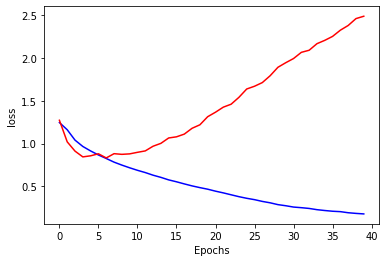

In [34]:
import matplotlib.pyplot as plt

# Visualization of the training process on the loss function 
plt.plot(history.history["loss"], color="b")
plt.plot(history.history["val_loss"], color="r")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.show()

2. Create a graph showing your accuracy in relation to the number of epochs.

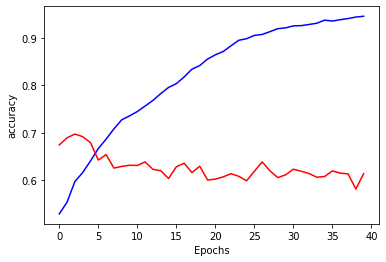

In [35]:
# Visualization of accuracy training 
plt.plot(history.history["sparse_categorical_accuracy"], color="b")
plt.plot(history.history["val_sparse_categorical_accuracy"], color="r")
plt.ylabel("accuracy")
plt.xlabel("Epochs")
plt.show()